In [1]:
!pip install scipy --upgrade
!pip install seaborn --upgrade

In [2]:
seaborn_version = sns.__version__
seaborn_version

NameError: name 'sns' is not defined

In [3]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import numpy as np

In [4]:
file_path = "C:/dataset.arff"

In [5]:
!pip install liac-arff
import arff
with open(file_path, 'r') as f:
    dataset = arff.load(f)

In [6]:
import pandas as pd

def custom_arff_parser(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    data_section = False
    attributes = []
    data = []
    
    for line in lines:
        line = line.strip()
        if line.startswith('@ATTRIBUTE'):
            parts = line.split(' ', 2)
            attr_name = parts[1].replace('"', '').replace(' ', '_')
            attr_type = parts[2]
            attributes.append((attr_name, attr_type))
        elif line.lower() == '@data':
            data_section = True
        elif data_section:
            if not line or line.startswith('%'):
                continue
            data.append(line.split(','))

    # Create a DataFrame
    attr_names = [attr[0] for attr in attributes]
    df = pd.DataFrame(data, columns=attr_names)
    
    return df

# Use the custom ARFF parser
file_path = r'C:/dataset.arff'
df = custom_arff_parser(file_path)

# Display the DataFrame
df.head()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [7]:
df.tail()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [8]:
print(df['Product'].nunique())

10000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UDI         10000 non-null  object
 1   Product     10000 non-null  object
 2   Type        10000 non-null  object
 3   Air         10000 non-null  object
 4   Process     10000 non-null  object
 5   Rotational  10000 non-null  object
 6   Torque      10000 non-null  object
 7   Tool        10000 non-null  object
 8   Machine     10000 non-null  object
 9   TWF         10000 non-null  object
 10  HDF         10000 non-null  object
 11  PWF         10000 non-null  object
 12  OSF         10000 non-null  object
 13  RNF         10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [10]:
#Convert column to Float. 
df['Air'] = df['Air'].astype(float)

In [11]:
df['Air'].describe()

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air, dtype: float64

In [12]:
# Repeat the same for other columns with numerical data
df['Process'] = df['Process'].astype(float)
df['Process'].describe()

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process, dtype: float64

In [13]:
# Repeat the same for other columns with numerical data
df['Rotational'] = df['Rotational'].astype(float)
df['Rotational'].describe()

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational, dtype: float64

In [14]:
# Repeat the same for other columns with numerical data
df['Torque'] = df['Torque'].astype(float)
df['Torque'].describe()

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque, dtype: float64

In [15]:
df['Tool'] = df['Tool'].astype(float)
df['Tool'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Tool
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [16]:
 print(df['Air'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Air
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB
None


In [17]:
# Check what items are located in "Machine"
print(df['Machine'].unique())

['0' '1']


In [18]:
print(df['Machine'].value_counts())

Machine
0    9661
1     339
Name: count, dtype: int64


In [19]:
# Convert to Float
df['Machine'] = df['Machine'].astype(float)
df['Machine'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Machine
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [20]:
print(df['Machine'].unique())

[0. 1.]


In [21]:
print(df['Machine'].value_counts())

Machine
0.0    9661
1.0     339
Name: count, dtype: int64


In [22]:
# Do the same for the rest columns
print(df['TWF'].unique())

['0' '1']


In [23]:
print(df['TWF'].value_counts())

TWF
0    9954
1      46
Name: count, dtype: int64


In [24]:
df['TWF'] = df['TWF'].astype(float)
df['TWF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: TWF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [25]:
print(df['HDF'].unique())
print(df['HDF'].value_counts())

['0' '1']
HDF
0    9885
1     115
Name: count, dtype: int64


In [26]:
df['HDF'] = df['HDF'].astype(float)
df['HDF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: HDF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [27]:
print(df['PWF'].unique())
print(df['PWF'].value_counts())

['0' '1']
PWF
0    9905
1      95
Name: count, dtype: int64


In [28]:
df['PWF'] = df['PWF'].astype(float)
df['PWF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: PWF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [29]:
print(df['OSF'].unique())
print(df['OSF'].value_counts())

['0' '1']
OSF
0    9902
1      98
Name: count, dtype: int64


In [30]:
df['OSF'] = df['OSF'].astype(float)
df['OSF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: OSF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [31]:
print(df['RNF'].unique())
print(df['RNF'].value_counts())

['0' '1']
RNF
0    9981
1      19
Name: count, dtype: int64


In [32]:
df['RNF'] = df['RNF'].astype(float)
df['RNF'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: RNF
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [33]:
print(df['UDI'].nunique())

10000


In [34]:
print(df['UDI'].unique())
print(df['UDI'].value_counts())

['1' '2' '3' ... '9998' '9999' '10000']
UDI
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64


In [35]:
df['UDI'] = df['UDI'].astype(float)
df['UDI'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: UDI
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


In [36]:
print(df['Product'].unique())
print(df['Product'].value_counts())

['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Product
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64


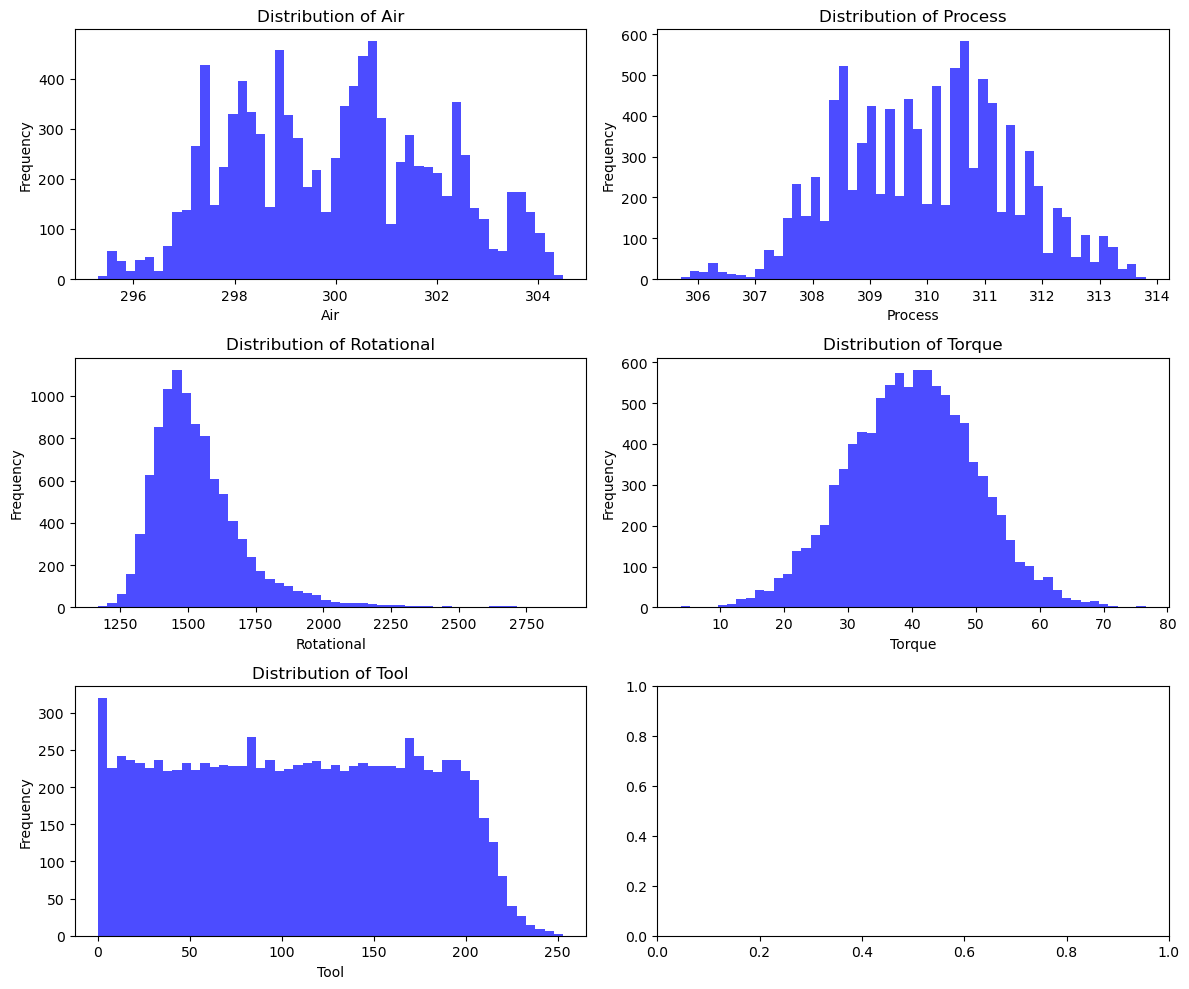

In [37]:
# Plotting distributions for each specified column
columns_to_plot = ['Air', 'Process', 'Rotational', 'Torque', 'Tool']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.hist(df[column], bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

We can see the spike in Rotational distribution at 1500 rpm with a few outliers around 2750 rpm.
Average tourque among all pieces of equipment is between 35-45


We can also see that expected time between failures is 200-210 minutes

In [38]:
# Exclude the 'Product' and 'Type' columns as correlation is possible for numerical data only
df_numeric = df.drop(columns=['Product', 'Type'])

df_numeric.head(15)

,UDI,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
0,1.0,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,298.1,308.6,1425.0,41.9,11.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,298.1,308.6,1558.0,42.4,14.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,298.1,308.6,1527.0,40.2,16.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,298.3,308.7,1667.0,28.6,18.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10.0,298.5,309.0,1741.0,28.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0


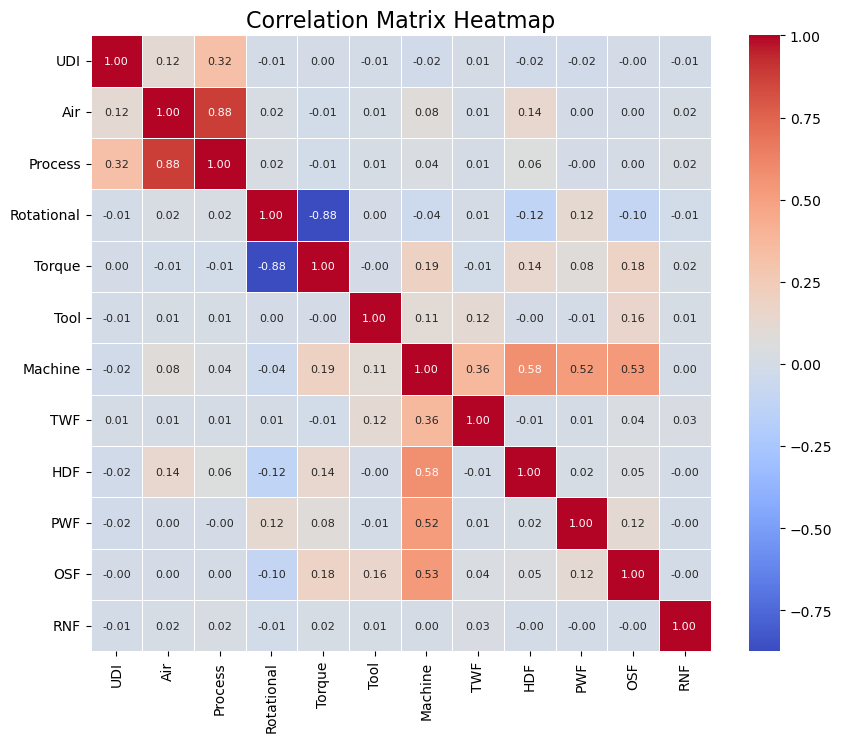

In [39]:
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with all cells labeled
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})


# Title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

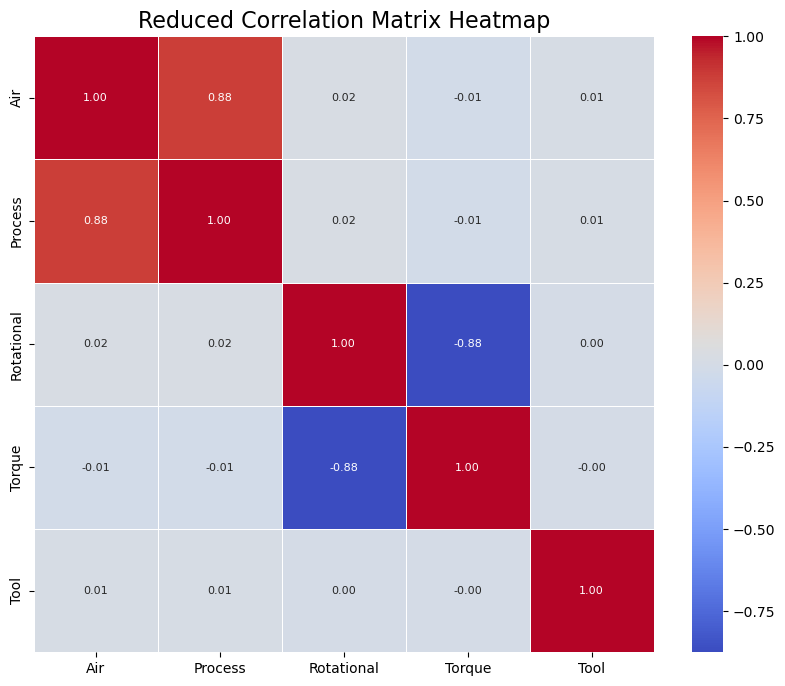

In [61]:
# Drop unnecessary columns and calculate correlation matrix
corr_matrix_reduced = df_numeric.drop(['UDI', 'Machine', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Reduced Correlation Matrix Heatmap', fontsize=16)
plt.show()

We can see strong positive correlation between Process&Air; and strong negative correlation between Rotational&Torque

In [40]:
#Converting arff to csv
df.to_csv('dataset.csv', index=False)

In [41]:
#Open csv file
csv = 'dataset.csv'
df_csv = pd.read_csv(csv)
df_csv.head()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UDI         10000 non-null  float64
 1   Product     10000 non-null  object 
 2   Type        10000 non-null  object 
 3   Air         10000 non-null  float64
 4   Process     10000 non-null  float64
 5   Rotational  10000 non-null  float64
 6   Torque      10000 non-null  float64
 7   Tool        10000 non-null  float64
 8   Machine     10000 non-null  float64
 9   TWF         10000 non-null  float64
 10  HDF         10000 non-null  float64
 11  PWF         10000 non-null  float64
 12  OSF         10000 non-null  float64
 13  RNF         10000 non-null  float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


In [43]:
df_csv.head()

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values. 
tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes:<br>
tool wear failure (TWF): <br>the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).<br>
<br>
heat dissipation failure (HDF):<br> heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.<br>
<br>
power failure (PWF):<br> the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.<br>
<br>
overstrain failure (OSF):<br> if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.<br>
<br>
random failures (RNF):<br> each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail 

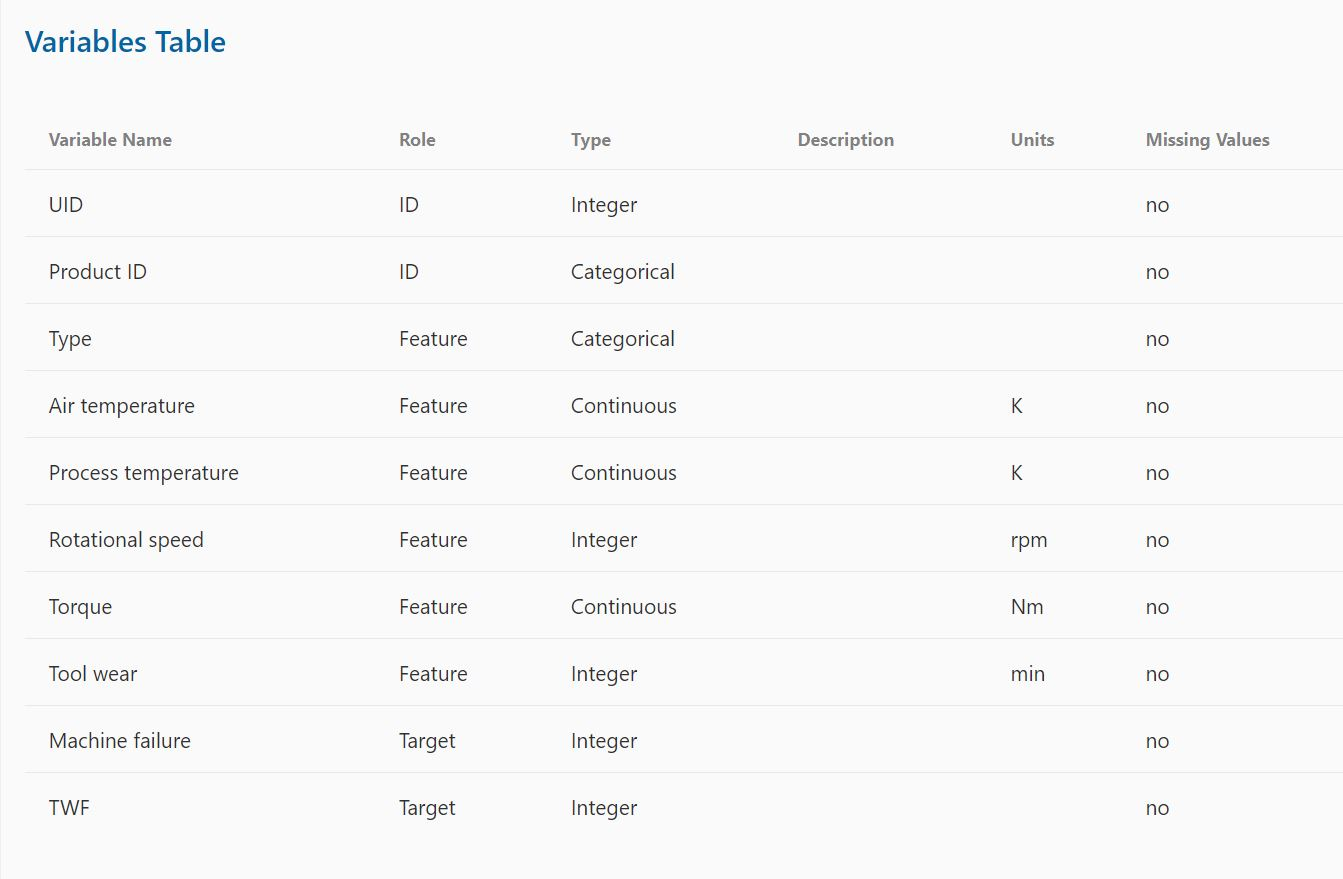

In [44]:
machine_failure_data = df_csv[df_csv['Machine'] == 1]

# Calculate the average Air temperature when Machine failure occurs
average_air_temp_failure = machine_failure_data['Air'].mean()

# Display the average Air temperature when Machine failure occurs
average_air_temp_failure

300.88643067846607

In [45]:
machine_failure_data = df_csv[df_csv['Machine'] == 1]

# Calculate the average Air temperature when Machine failure occurs
average_process_temp_failure = machine_failure_data['Process'].mean()

# Display the average Air temperature when Machine failure occurs
average_process_temp_failure

310.2902654867257

In [46]:
machine_failure_data = df_csv[df_csv['Machine'] == 1]

# Calculate the average Air temperature when Machine failure occurs
average_rotational_failure = machine_failure_data['Rotational'].mean()

# Display the average Air temperature when Machine failure occurs
average_rotational_failure

1496.486725663717

In [47]:
machine_failure_data = df_csv[df_csv['Machine'] == 1]

# Calculate the average Air temperature when Machine failure occurs
average_torque_failure = machine_failure_data['Torque'].mean()

# Display the average Air temperature when Machine failure occurs
average_torque_failure

50.16814159292036

In [48]:
machine_failure_data = df_csv[df_csv['Machine'] == 1]

# Calculate the average Air temperature when Machine failure occurs
average_tool_failure = machine_failure_data['Tool'].mean()

# Display the average Air temperature when Machine failure occurs
average_tool_failure

143.78171091445427

In [49]:
df_csv['Tool'] = df_csv['Tool'].astype(float)
df_csv['Tool'].describe()

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool, dtype: float64

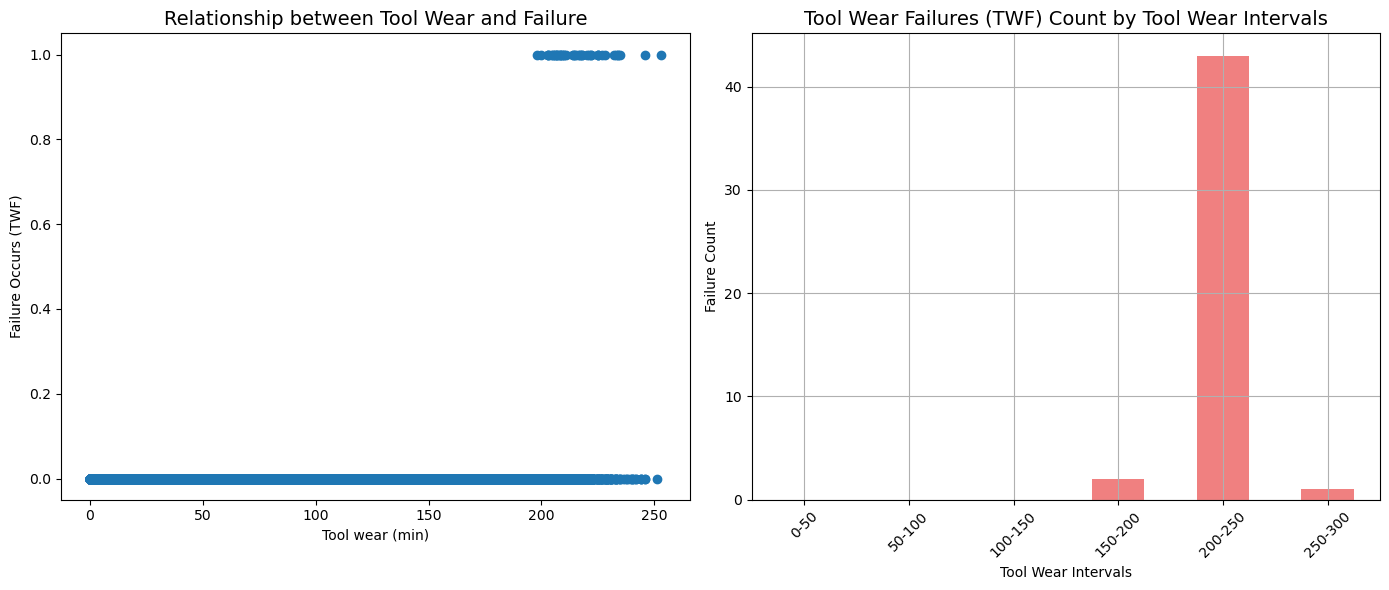

In [50]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Tool Wear vs Tool Wear Failure (TWF))
axes[0].scatter(df_csv['Tool'], df_csv['TWF'])
axes[0].set_xlabel("Tool wear (min)", fontsize=10)
axes[0].set_ylabel("Failure Occurs (TWF)", fontsize=10)
axes[0].set_title("Relationship between Tool Wear and Failure", fontsize=14)

# Define the bin intervals for Tool Wear
bins = [0, 50, 100, 150, 200, 250, 300]  # Example bins, adjust as needed
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Bin the Tool Wear values and count failures (TWF = 1) in each bin
df_csv['Tool Wear Bin'] = pd.cut(df_csv['Tool'], bins=bins, labels=labels)
failure_counts = df_csv[df_csv['TWF'] == 1]['Tool Wear Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Tool Wear intervals)
failure_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Tool Wear Failures (TWF) Count by Tool Wear Intervals', fontsize=14)
axes[1].set_xlabel('Tool Wear Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

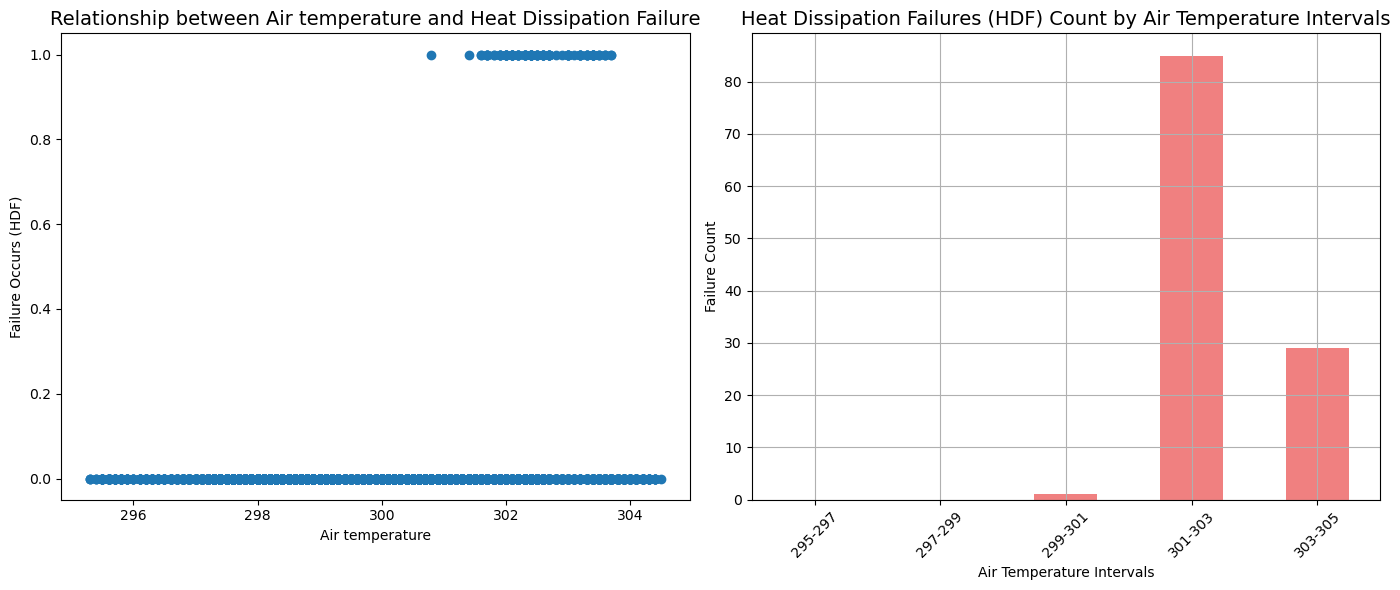

In [51]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Air Temperature vs Heat Dissipation Failure (HDF))
axes[0].scatter(df_csv['Air'], df_csv['HDF'])
axes[0].set_xlabel("Air temperature", fontsize=10)
axes[0].set_ylabel("Failure Occurs (HDF)", fontsize=10)
axes[0].set_title("Relationship between Air temperature and Heat Dissipation Failure", fontsize=14)

# Define the bin intervals for Air temperature
bins = [295, 297, 299, 301, 303, 305]  # Example bins, adjust as needed
labels = ['295-297', '297-299', '299-301', '301-303', '303-305']

# Bin the Air temperature values and count failures (HDF = 1) in each bin
df_csv['Air Bin'] = pd.cut(df_csv['Air'], bins=bins, labels=labels)
failure_counts = df_csv[df_csv['HDF'] == 1]['Air Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Air temperature intervals)
failure_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Heat Dissipation Failures (HDF) Count by Air Temperature Intervals', fontsize=14)
axes[1].set_xlabel('Air Temperature Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

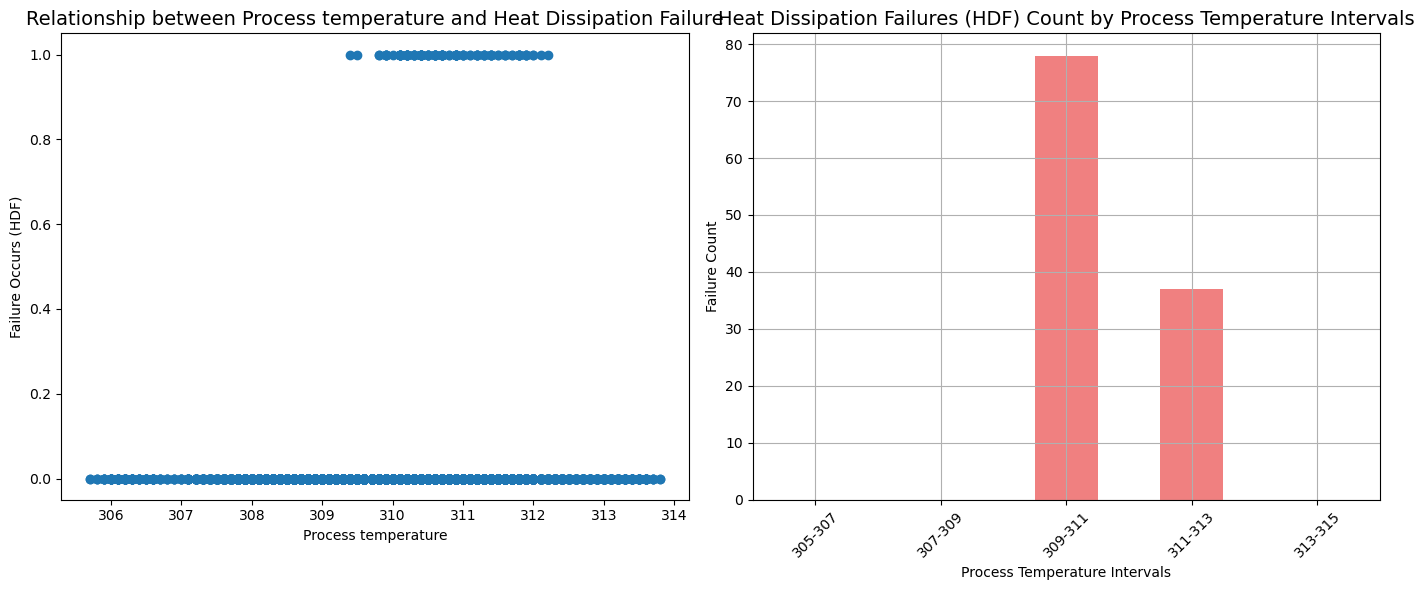

In [52]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Process Temperature vs Heat Dissipation Failure (HDF))
axes[0].scatter(df_csv['Process'], df_csv['HDF'])
axes[0].set_xlabel("Process temperature", fontsize=10)
axes[0].set_ylabel("Failure Occurs (HDF)", fontsize=10)
axes[0].set_title("Relationship between Process temperature and Heat Dissipation Failure", fontsize=14)

# Define the bin intervals for Process temperature
bins = [305, 307, 309, 311, 313, 315]  # Example bins, adjust as needed
labels = ['305-307', '307-309', '309-311', '311-313', '313-315']

# Bin the Process temperature values and count failures (HDF = 1) in each bin
df_csv['Process Bin'] = pd.cut(df_csv['Process'], bins=bins, labels=labels)
failure_counts = df_csv[df_csv['HDF'] == 1]['Process Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Process temperature intervals)
failure_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Heat Dissipation Failures (HDF) Count by Process Temperature Intervals', fontsize=14)
axes[1].set_xlabel('Process Temperature Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

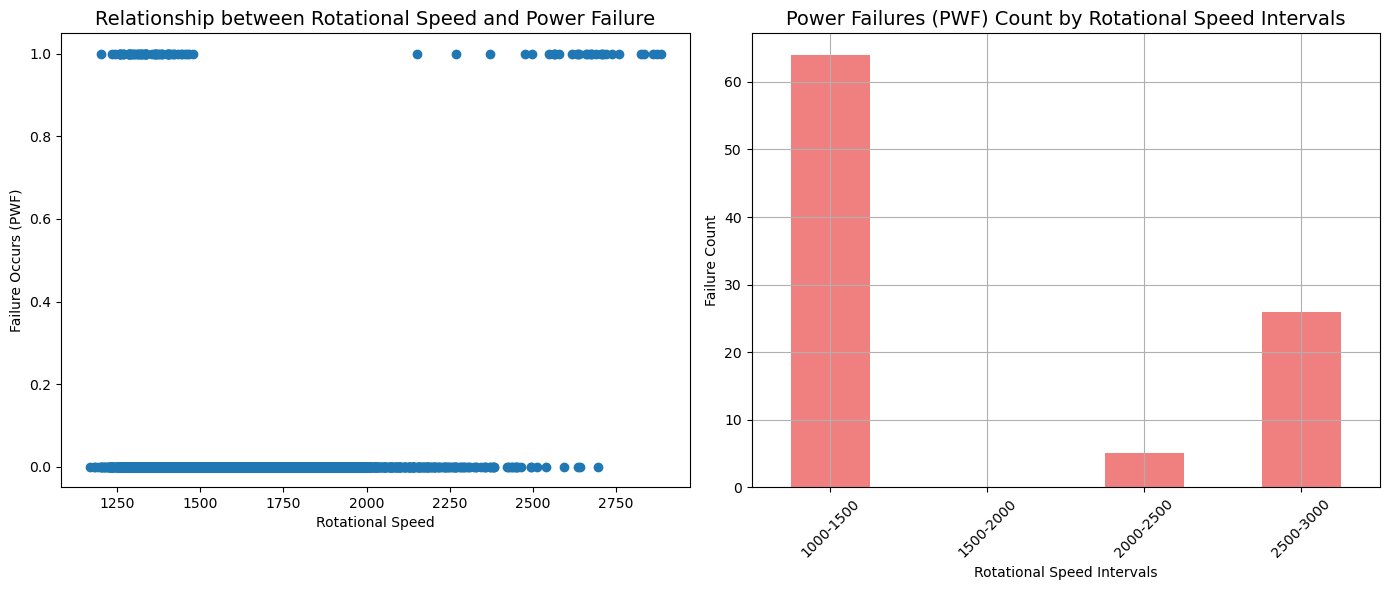

In [53]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Rotational Speed vs Power Failure (PWF))
axes[0].scatter(df_csv['Rotational'], df_csv['PWF'])
axes[0].set_xlabel("Rotational Speed", fontsize=10)
axes[0].set_ylabel("Failure Occurs (PWF)", fontsize=10)
axes[0].set_title("Relationship between Rotational Speed and Power Failure", fontsize=14)

# Define the bin intervals for Rotational Speed
bins = [1000, 1500, 2000, 2500, 3000]  # Example bins, adjust as needed
labels = ['1000-1500', '1500-2000', '2000-2500', '2500-3000']

# Bin the Rotational Speed values and count failures (PWF = 1) in each bin
df_csv['Rotational Bin'] = pd.cut(df_csv['Rotational'], bins=bins, labels=labels)
failure_counts = df_csv[df_csv['PWF'] == 1]['Rotational Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Rotational Speed intervals)
failure_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Power Failures (PWF) Count by Rotational Speed Intervals', fontsize=14)
axes[1].set_xlabel('Rotational Speed Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

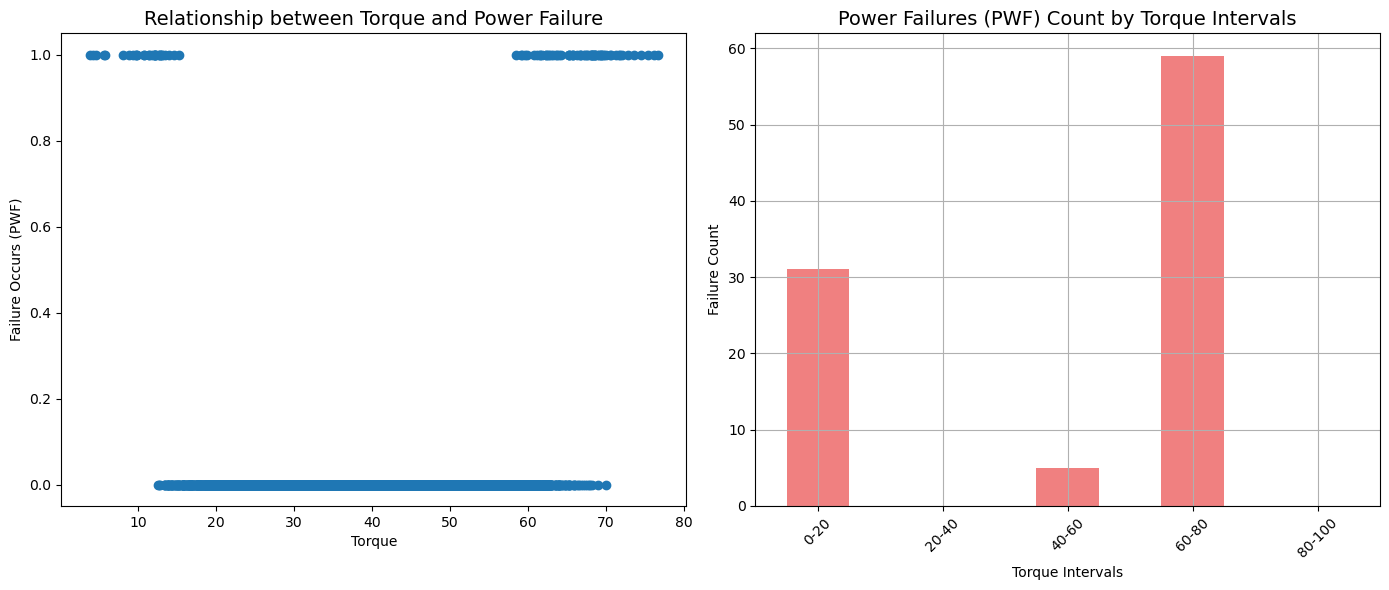

In [54]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Torque vs Power Failure (PWF))
axes[0].scatter(df_csv['Torque'], df_csv['PWF'])
axes[0].set_xlabel("Torque", fontsize=10)
axes[0].set_ylabel("Failure Occurs (PWF)", fontsize=10)
axes[0].set_title("Relationship between Torque and Power Failure", fontsize=14)

# Define the bin intervals for Torque
bins = [0, 20, 40, 60, 80, 100]  # Example bins, adjust as needed
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Bin the Torque values and count failures (PWF = 1) in each bin
df_csv['Torque Bin'] = pd.cut(df_csv['Torque'], bins=bins, labels=labels)
failure_counts_torque_pwf = df_csv[df_csv['PWF'] == 1]['Torque Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Torque intervals for PWF)
failure_counts_torque_pwf.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Power Failures (PWF) Count by Torque Intervals', fontsize=14)
axes[1].set_xlabel('Torque Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [55]:
total_failures_torque_pwf = failure_counts_torque_pwf.sum()

# Failures in the 60-80 interval
failures_60_80 = failure_counts_torque_pwf['60-80']

# Percentage of failures in the 60-80 interval
percentage_60_80 = (failures_60_80 / total_failures_torque_pwf) * 100
percentage_60_80

62.10526315789474

Graphs indicate that the 62% of Power issues caused by torque deviations occurs when torque is 60-80 NM range.

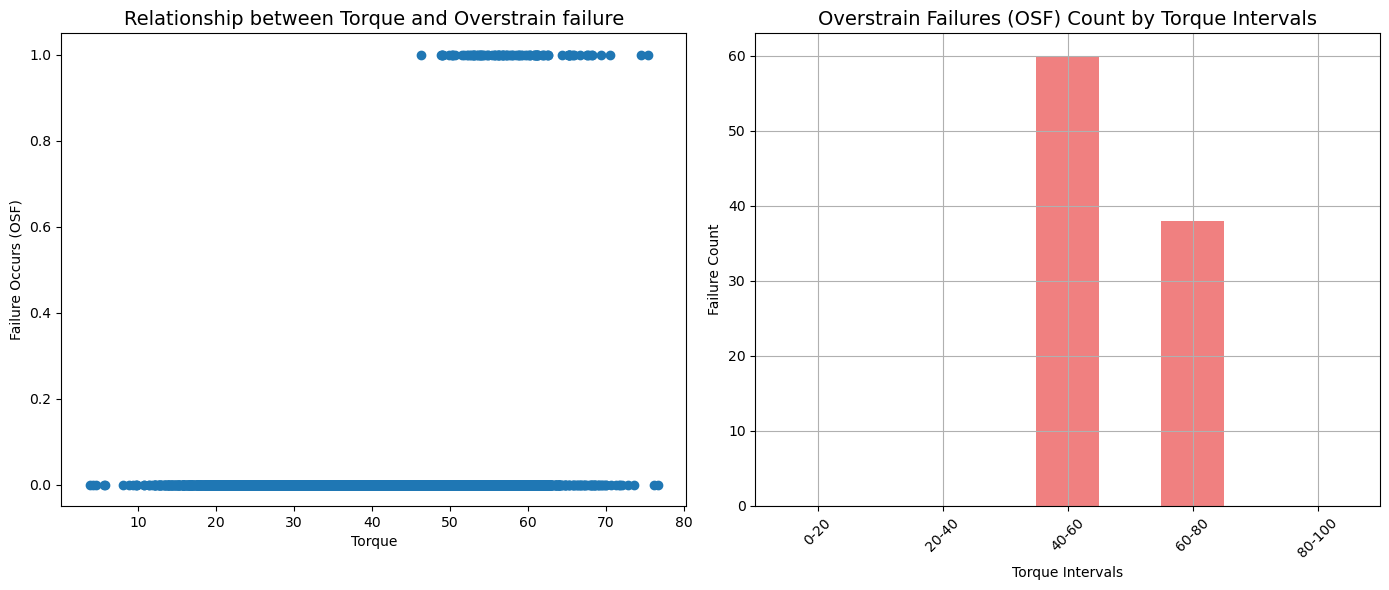

In [56]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Torque vs OSF)
axes[0].scatter(df_csv['Torque'], df_csv['OSF'])
axes[0].set_xlabel("Torque", fontsize=10)
axes[0].set_ylabel("Failure Occurs (OSF)", fontsize=10)
axes[0].set_title("Relationship between Torque and Overstrain failure", fontsize=14)

# Define the bin intervals for Torque
bins = [0, 20, 40, 60, 80, 100]  # Example bins, adjust as needed
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Bin the Torque values and count failures (OSF = 1) in each bin
df_csv['Torque Bin'] = pd.cut(df_csv['Torque'], bins=bins, labels=labels)
failure_counts_torque_osf = df_csv[df_csv['OSF'] == 1]['Torque Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Torque intervals)
failure_counts_torque_osf.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Overstrain Failures (OSF) Count by Torque Intervals', fontsize=14)
axes[1].set_xlabel('Torque Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [57]:
total_failures_torque_osf = failure_counts_torque_osf.sum()

# Failures in the 40-60 interval
failures_40_60 = failure_counts_torque_osf['40-60']

# Percentage of failures in the 40_60 interval
percentage_40_60 = (failures_40_60 / total_failures_torque_osf) * 100
percentage_40_60

61.224489795918366

Graphs indicate that the 61% of issues caused by torque deviations occurs when torque is 40-60 NM range.

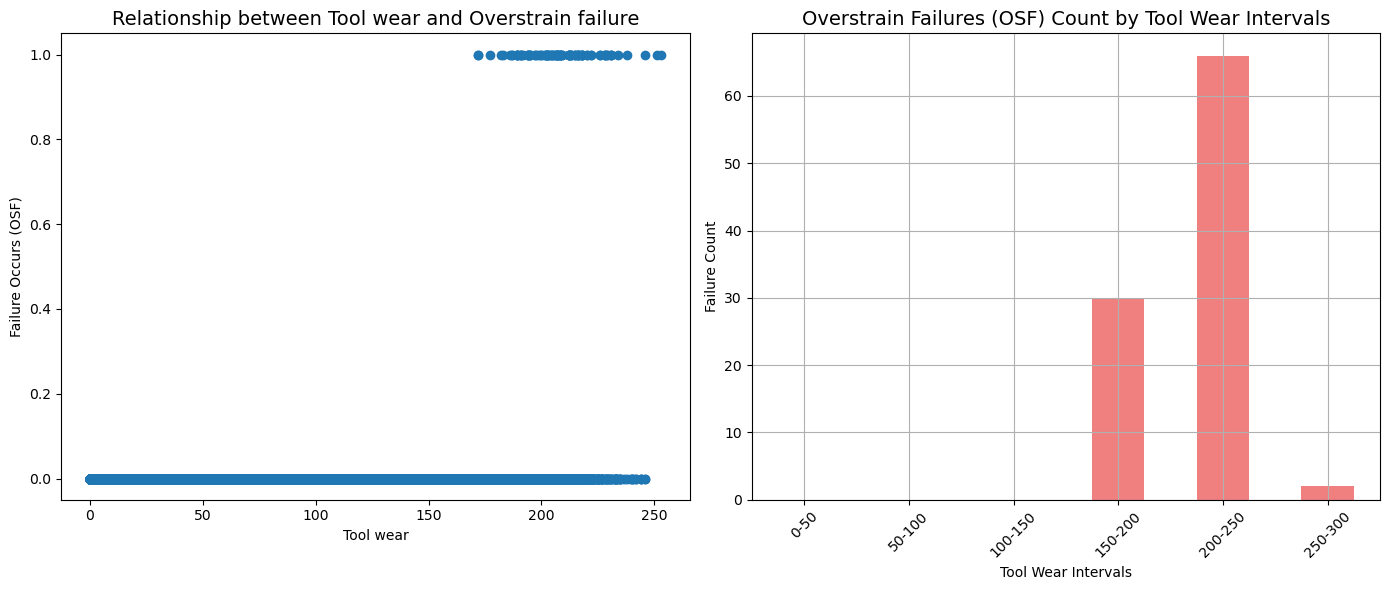

In [58]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Scatter plot (Tool wear vs OSF)
axes[0].scatter(df_csv['Tool'], df_csv['OSF'])
axes[0].set_xlabel("Tool wear", fontsize=10)
axes[0].set_ylabel("Failure Occurs (OSF)", fontsize=10)
axes[0].set_title("Relationship between Tool wear and Overstrain failure", fontsize=14)

# Define the bin intervals for Tool wear
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Bin the Tool wear values and count failures (OSF = 1) in each bin
df_csv['Wear Bin'] = pd.cut(df_csv['Tool'], bins=bins, labels=labels)
failure_counts_osf = df_csv[df_csv['OSF'] == 1]['Wear Bin'].value_counts(sort=False)

# Second plot: Bar plot (Failure counts by Tool wear intervals)
failure_counts_osf.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Overstrain Failures (OSF) Count by Tool Wear Intervals', fontsize=14)
axes[1].set_xlabel('Tool Wear Intervals', fontsize=10)
axes[1].set_ylabel('Failure Count', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [59]:
total_failures_osf = failure_counts_osf.sum()

# Failures in the 200-250 interval
failures_200_250 = failure_counts_osf['200-250']

# Percentage of failures in the 200-250 interval
percentage_200_250 = (failures_200_250 / total_failures_osf) * 100
percentage_200_250

67.3469387755102

Graphs indicate that the 67% of issues caused by tool wear occurs within 200-250 min interval.

In [60]:
df_csv.head(500)

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF,Tool Wear Bin,Air Bin,Process Bin,Rotational Bin,Torque Bin,Wear Bin
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,297-299,307-309,1500-2000,40-60,NaN
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0-50,297-299,307-309,1000-1500,40-60,0-50
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0-50,297-299,307-309,1000-1500,40-60,0-50
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0-50,297-299,307-309,1000-1500,20-40,0-50
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0-50,297-299,307-309,1000-1500,20-40,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496.0,H29909,H,297.5,309.3,1459.0,49.7,201.0,0.0,0.0,0.0,0.0,0.0,0.0,200-250,297-299,309-311,1000-1500,40-60,200-250
496,497.0,M15356,M,297.5,309.2,1530.0,40.0,206.0,0.0,0.0,0.0,0.0,0.0,0.0,200-250,297-299,309-311,1500-2000,20-40,200-250
497,498.0,L47677,L,297.4,309.0,1505.0,39.2,209.0,0.0,0.0,0.0,0.0,0.0,0.0,200-250,297-299,307-309,1500-2000,20-40,200-250
498,499.0,L47678,L,297.5,309.1,1611.0,30.2,211.0,0.0,0.0,0.0,0.0,0.0,0.0,200-250,297-299,309-311,1500-2000,20-40,200-250


C:\Users\makar\AppData\Local\Temp\ipykernel_20252\1510823319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Torque'] = pd.to_numeric(data['Torque'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\1510823319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Torque'] = pd.to_numeric(data['Torque'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\1510823319.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

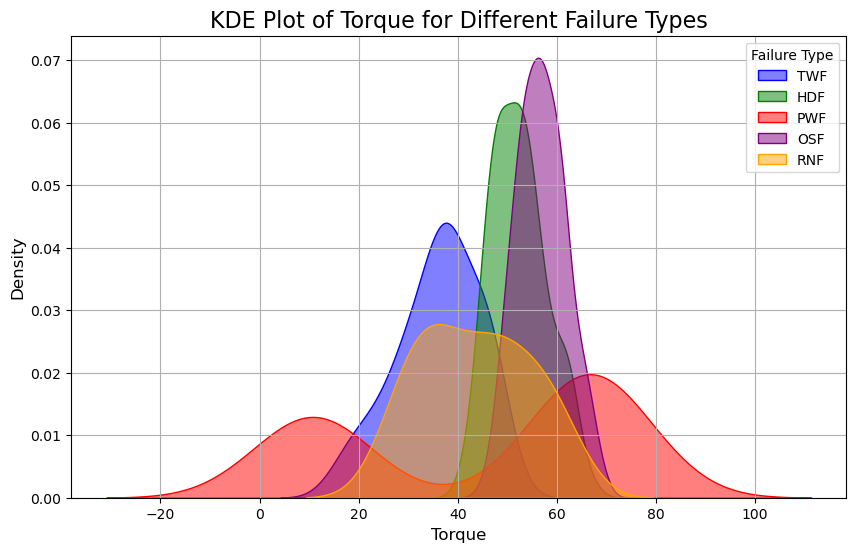

In [74]:
# Filter datasets
twf_failures_filtered = df[(df['TWF'] == 1) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
hdf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 1) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
pwf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 1) & (df['OSF'] == 0) & (df['RNF'] == 0)]
osf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 1) & (df['RNF'] == 0)]
rnf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 1)]

# Ensure numeric values and drop NaNs if any
def clean_data(data):
    data['Torque'] = pd.to_numeric(data['Torque'], errors='coerce')
    return data.dropna(subset=['Torque'])

twf_failures_filtered = clean_data(twf_failures_filtered)
hdf_failures_filtered = clean_data(hdf_failures_filtered)
pwf_failures_filtered = clean_data(pwf_failures_filtered)
osf_failures_filtered = clean_data(osf_failures_filtered)
rnf_failures_filtered = clean_data(rnf_failures_filtered)

# Plot all KDEs on the same graph
plt.figure(figsize=(10, 6))

sns.kdeplot(data=twf_failures_filtered, x='Torque', fill=True, label='TWF', color='blue', alpha=0.5)
sns.kdeplot(data=hdf_failures_filtered, x='Torque', fill=True, label='HDF', color='green', alpha=0.5)
sns.kdeplot(data=pwf_failures_filtered, x='Torque', fill=True, label='PWF', color='red', alpha=0.5)
sns.kdeplot(data=osf_failures_filtered, x='Torque', fill=True, label='OSF', color='purple', alpha=0.5)
sns.kdeplot(data=rnf_failures_filtered, x='Torque', fill=True, label='RNF', color='orange', alpha=0.5)

# Add plot title and labels
plt.title('KDE Plot of Torque for Different Failure Types', fontsize=16)
plt.xlabel('Torque', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Failure Type')

# Display the grid and show the plot
plt.grid(True)
plt.show()

C:\Users\makar\AppData\Local\Temp\ipykernel_20252\2678669862.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Air'] = pd.to_numeric(data['Air'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\2678669862.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Air'] = pd.to_numeric(data['Air'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\2678669862.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

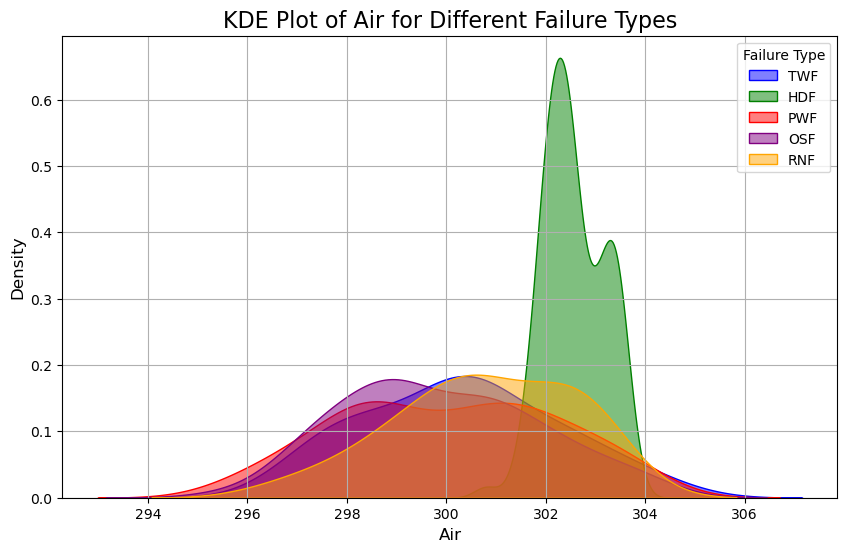

In [77]:
# Filter datasets
twf_failures_filtered = df[(df['TWF'] == 1) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
hdf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 1) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
pwf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 1) & (df['OSF'] == 0) & (df['RNF'] == 0)]
osf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 1) & (df['RNF'] == 0)]
rnf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 1)]

# Ensure numeric values and drop NaNs if any
def clean_data(data):
    data['Air'] = pd.to_numeric(data['Air'], errors='coerce')
    return data.dropna(subset=['Air'])

twf_failures_filtered = clean_data(twf_failures_filtered)
hdf_failures_filtered = clean_data(hdf_failures_filtered)
pwf_failures_filtered = clean_data(pwf_failures_filtered)
osf_failures_filtered = clean_data(osf_failures_filtered)
rnf_failures_filtered = clean_data(rnf_failures_filtered)

# Plot all KDEs on the same graph
plt.figure(figsize=(10, 6))

sns.kdeplot(data=twf_failures_filtered, x='Air', fill=True, label='TWF', color='blue', alpha=0.5)
sns.kdeplot(data=hdf_failures_filtered, x='Air', fill=True, label='HDF', color='green', alpha=0.5)
sns.kdeplot(data=pwf_failures_filtered, x='Air', fill=True, label='PWF', color='red', alpha=0.5)
sns.kdeplot(data=osf_failures_filtered, x='Air', fill=True, label='OSF', color='purple', alpha=0.5)
sns.kdeplot(data=rnf_failures_filtered, x='Air', fill=True, label='RNF', color='orange', alpha=0.5)

# Add plot title and labels
plt.title('KDE Plot of Air for Different Failure Types', fontsize=16)
plt.xlabel('Air', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Failure Type')

# Display the grid and show the plot
plt.grid(True)
plt.show()

C:\Users\makar\AppData\Local\Temp\ipykernel_20252\4196778433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tool'] = pd.to_numeric(data['Tool'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\4196778433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tool'] = pd.to_numeric(data['Tool'], errors='coerce')
C:\Users\makar\AppData\Local\Temp\ipykernel_20252\4196778433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

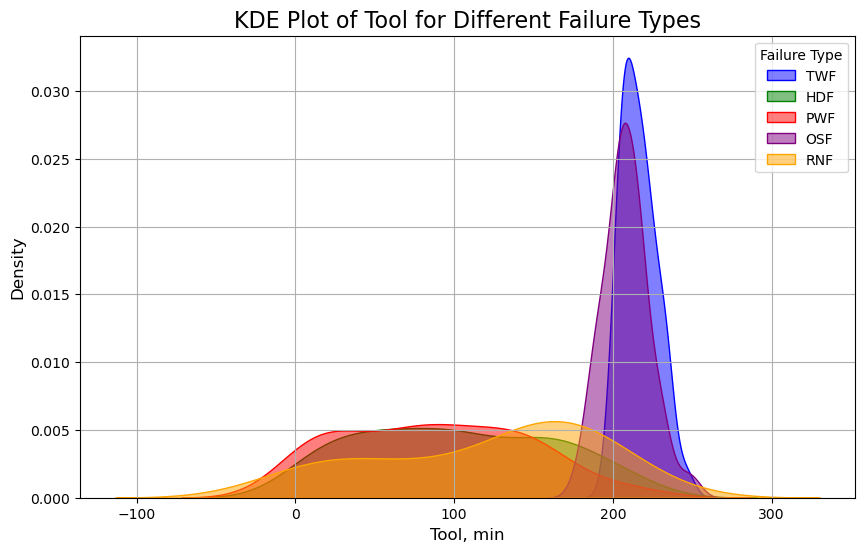

In [78]:
# Filter datasets
twf_failures_filtered = df[(df['TWF'] == 1) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
hdf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 1) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 0)]
pwf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 1) & (df['OSF'] == 0) & (df['RNF'] == 0)]
osf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 1) & (df['RNF'] == 0)]
rnf_failures_filtered = df[(df['TWF'] == 0) & (df['HDF'] == 0) & (df['PWF'] == 0) & (df['OSF'] == 0) & (df['RNF'] == 1)]

# Ensure numeric values and drop NaNs if any
def clean_data(data):
    data['Tool'] = pd.to_numeric(data['Tool'], errors='coerce')
    return data.dropna(subset=['Tool'])

twf_failures_filtered = clean_data(twf_failures_filtered)
hdf_failures_filtered = clean_data(hdf_failures_filtered)
pwf_failures_filtered = clean_data(pwf_failures_filtered)
osf_failures_filtered = clean_data(osf_failures_filtered)
rnf_failures_filtered = clean_data(rnf_failures_filtered)

# Plot all KDEs on the same graph
plt.figure(figsize=(10, 6))

sns.kdeplot(data=twf_failures_filtered, x='Tool', fill=True, label='TWF', color='blue', alpha=0.5)
sns.kdeplot(data=hdf_failures_filtered, x='Tool', fill=True, label='HDF', color='green', alpha=0.5)
sns.kdeplot(data=pwf_failures_filtered, x='Tool', fill=True, label='PWF', color='red', alpha=0.5)
sns.kdeplot(data=osf_failures_filtered, x='Tool', fill=True, label='OSF', color='purple', alpha=0.5)
sns.kdeplot(data=rnf_failures_filtered, x='Tool', fill=True, label='RNF', color='orange', alpha=0.5)

# Add plot title and labels
plt.title('KDE Plot of Tool for Different Failure Types', fontsize=16)
plt.xlabel('Tool, min', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Failure Type')

# Display the grid and show the plot
plt.grid(True)
plt.show()

In [79]:
# Check the lowest value in the 'Tool' column
lowest_tool_value = df['Tool'].min()
lowest_tool_value

0.0

In [83]:
# Check how many rows have 1 in more than one failure column
failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']  # Specify the relevant columns

# Calculate the number of rows with more than one '1' in the specified columns
rows_with_multiple_failures = df[failure_columns].sum(axis=1) > 1
num_rows_multiple_failures = rows_with_multiple_failures.sum()
num_rows_multiple_failures
 

24

In [82]:
# Retrieve and display the rows with more than one '1' in the failure columns
failure_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']  # Relevant columns

# Identify rows with more than one '1' in the specified columns
rows_with_multiple_failures = df[df[failure_columns].sum(axis=1) > 1]

rows_with_multiple_failures

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF
69,70.0,L47249,L,298.9,309.0,1410.0,65.7,191.0,1.0,0.0,0.0,1.0,1.0,0.0
1324,1325.0,M16184,M,298.8,310.1,1243.0,74.5,194.0,1.0,0.0,0.0,1.0,1.0,0.0
1496,1497.0,L48676,L,298.0,308.7,1268.0,69.4,189.0,1.0,0.0,0.0,1.0,1.0,0.0
3611,3612.0,L50791,L,301.7,310.9,1405.0,46.4,207.0,1.0,1.0,0.0,0.0,0.0,1.0
3854,3855.0,L51034,L,302.4,311.0,1338.0,67.6,194.0,1.0,0.0,0.0,1.0,1.0,0.0
3943,3944.0,L51123,L,302.3,311.4,1333.0,66.7,205.0,1.0,0.0,0.0,1.0,1.0,0.0
4254,4255.0,L51434,L,302.6,311.0,1284.0,68.0,114.0,1.0,0.0,1.0,1.0,0.0,0.0
4342,4343.0,M19202,M,301.7,309.8,1284.0,68.2,111.0,1.0,0.0,1.0,1.0,0.0,0.0
4370,4371.0,L51550,L,302.0,309.9,1308.0,57.6,197.0,1.0,0.0,1.0,0.0,1.0,0.0
4383,4384.0,L51563,L,301.7,309.5,1298.0,65.5,229.0,1.0,0.0,1.0,0.0,1.0,0.0


In [89]:
# Function to concatenate all failure types in case of multiple failures
def get_failure_types(row):
    failures = [col for col in failure_columns if row[col] == 1]
    return ', '.join(failures) if failures else 'No Failure'

# Apply the function to create the new 'Failure_Type' column
df['Failure_Type'] = df.apply(get_failure_types, axis=1)


# Filter and display rows where at least one failure (TWF, HDF, PWF, OSF, RNF) occurred
rows_with_failures = df[(df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)) > 0]

# Display the rows with at least one failure
rows_with_failures

,UDI,Product,Type,Air,Process,Rotational,Torque,Tool,Machine,TWF,HDF,PWF,OSF,RNF,Failure_Type
50,51.0,L47230,L,298.9,309.1,2861.0,4.6,143.0,1.0,0.0,0.0,1.0,0.0,0.0,PWF
69,70.0,L47249,L,298.9,309.0,1410.0,65.7,191.0,1.0,0.0,0.0,1.0,1.0,0.0,"PWF, OSF"
77,78.0,L47257,L,298.8,308.9,1455.0,41.3,208.0,1.0,1.0,0.0,0.0,0.0,0.0,TWF
160,161.0,L47340,L,298.4,308.2,1282.0,60.7,216.0,1.0,0.0,0.0,0.0,1.0,0.0,OSF
161,162.0,L47341,L,298.3,308.1,1412.0,52.3,218.0,1.0,0.0,0.0,0.0,1.0,0.0,OSF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759.0,L56938,L,298.6,309.8,2271.0,16.2,218.0,1.0,1.0,0.0,0.0,0.0,0.0,TWF
9764,9765.0,L56944,L,298.5,309.5,1294.0,66.7,12.0,1.0,0.0,0.0,1.0,0.0,0.0,PWF
9822,9823.0,L57002,L,298.5,309.4,1360.0,60.9,187.0,1.0,0.0,0.0,0.0,1.0,0.0,OSF
9830,9831.0,L57010,L,298.3,309.3,1337.0,56.1,206.0,1.0,0.0,0.0,0.0,1.0,0.0,OSF
